In [85]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

In [86]:
Iris = ds.load_iris()
xdata = Iris.data.astype(np.float32)
tdata = Iris.target.astype(np.int32)

In [87]:
D,N = xdata.shape

In [88]:
Dtrain = D//2
index = np.random.permutation(range(D))
xtrain = xdata[index[0:Dtrain],:]
ttrain = tdata[index[0:Dtrain]]
xtest = xdata[index[Dtrain:D],:]
ttest = tdata[index[Dtrain:D]]

In [89]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [97]:
C = np.max(tdata)+1
NN = Chain(l1=L.Linear(N,3),l2=L.Linear(3,3),l3=L.Linear(3,C))

In [98]:
def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.l2(h)
    h = F.relu(h)
    y = NN.l3(h)
    return y

In [99]:
optNN = Opt.Adam()
optNN.setup(NN)

In [100]:


train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [101]:
T = 10000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ytrain = model(xtrain)
    loss_train = F.softmax_cross_entropy(ytrain,ttrain)
    acc_train = F.accuracy(ytrain,ttrain)
    loss_train.backward()
    optNN.update()

    config.train = False
    ytest = model(xtest)
    loss_test = F.softmax_cross_entropy(ytest,ttest)
    acc_test = F.accuracy(ytest,ttest)
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

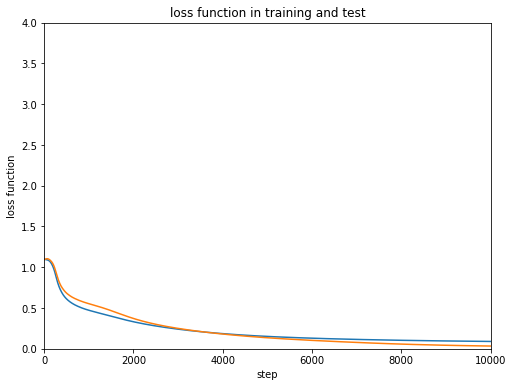

In [102]:
Tall = len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_loss)
plt.plot(range(Tall),test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()

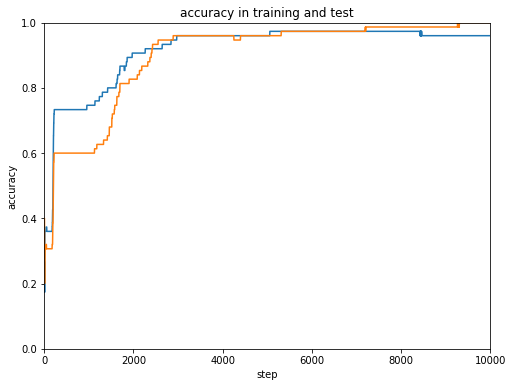

In [103]:
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_acc)
plt.plot(range(Tall),test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1.0])
plt.show()

In [55]:
dir(Opt)

['AMSBound',
 'AMSGrad',
 'AdaBound',
 'AdaDelta',
 'AdaGrad',
 'Adam',
 'AdamW',
 'CorrectedMomentumSGD',
 'MSVAG',
 'MomentumSGD',
 'NesterovAG',
 'RMSprop',
 'RMSpropGraves',
 'SGD',
 'SMORMS3',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ada_delta',
 'ada_grad',
 'adam',
 'corrected_momentum_sgd',
 'momentum_sgd',
 'msvag',
 'nesterov_ag',
 'rmsprop',
 'rmsprop_graves',
 'sgd',
 'smorms3']